# STAT 206 Final Project
**Dataset**: Loan Status Prediction  
https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data

**Team Members**: Ankit Malhotra, Nathaniel Zhu

In [1]:
versioninfo()

Julia Version 1.10.0
Commit 3120989f39b (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 12 × Apple M2 Pro
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
  Threads: 1 on 8 virtual cores
Environment:
  JULIA_NUM_THREADS = 


In [2]:
import Pkg
Pkg.activate()
Pkg.status()

  Activating project at `~/.julia/environments/v1.10`


Status `~/.julia/environments/v1.10/Project.toml`
  [cbdf2221] AlgebraOfGraphics v0.6.18
  [024491cd] BetaML v0.11.4
⌃ [336ed68f] CSV v0.10.12
  [13f3f980] CairoMakie v0.11.9
  [e2e10f9a] CatBoost v0.3.4
  [324d7699] CategoricalArrays v0.10.8
  [aaaa29a8] Clustering v0.15.7
  [8f4d0f93] Conda v1.10.0
  [a93c6f00] DataFrames v1.6.1
⌃ [1313f7d8] DataFramesMeta v0.14.1
  [b4f34e82] Distances v0.10.11
  [31c24e10] Distributions v0.25.107
⌃ [5789e2e9] FileIO v1.16.2
⌃ [587475ba] Flux v0.14.12
  [da1fdf0e] FreqTables v0.4.6
  [38e38edf] GLM v1.9.0
  [8d5ece8b] GLMNet v0.7.2
  [e9467ef8] GLMakie v0.9.9
  [09f84164] HypothesisTests v0.11.0
  [7073ff75] IJulia v1.24.2
  [4e3cecfd] ImageShow v0.3.8
  [f0e99cf1] MLBase v0.9.2
  [eb30cadb] MLDatasets v0.7.14
⌃ [add582a8] MLJ v0.20.2
  [d354fa79] MLJClusteringInterface v0.1.11
  [c6f25543] MLJDecisionTreeInterface v0.4.1
  [094fc8d1] MLJFlux v0.4.0
  [caf8df21] MLJGLMInterface v0.3.7
  [61c7150f] MLJLIBSVMInterface v0.2.1
  [6ee0df7b] MLJLinearMode

# Packages

In [3]:
# Loading Necessary Packages
using CSV, DataFrames, Shapefile
using CategoricalArrays, FreqTables
using Plots, StatsPlots, Statistics
using LinearAlgebra, StatsBase, HypothesisTests
using Distributions, Random, StableRNGs
using PalmerPenguins, RDatasets
using MLJ, NearestNeighborModels, MLJScikitLearnInterface, MLJMultivariateStatsInterface
using MLJDecisionTreeInterface, MLJLinearModels
using CatBoost

InitError: InitError: Python: ModuleNotFoundError: No module named 'catboost'
Python stacktrace: none
during initialization of module CatBoost

About this dataset and our eventual goal: 

1. In this Loan Status Prediction dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.
2. Decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous Credit History, Co-applicant Income, etc…
3. Our goal is to build a Machine Learning Model to predict the loan to be approved or to be rejected for an applicant.

# Main Coding

### Part 1: Data Importing and Cleaning

In [4]:
# Read the CSV file into a DataFrames
loan_data = CSV.read("Data/loan_data.csv", DataFrame)

# Display first few rows
first(loan_data, 10)

10×13 DataFrame
 Row │ Loan_ID   Gender    Married  Dependents  Education     Self_Employed  A ⋯
     │ String15  String7?  String3  String3?    String15      String3?       I ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ LP001003  Male      Yes      1           Graduate      No               ⋯
   2 │ LP001005  Male      Yes      0           Graduate      Yes
   3 │ LP001006  Male      Yes      0           Not Graduate  No
   4 │ LP001008  Male      No       0           Graduate      No
   5 │ LP001013  Male      Yes      0           Not Graduate  No               ⋯
   6 │ LP001024  Male      Yes      2           Graduate      No
   7 │ LP001027  Male      Yes      2           Graduate      missing       
   8 │ LP001029  Male      No       0           Graduate      No
   9 │ LP001030  Male      Yes      2           Graduate      No               ⋯
  10 │ LP001032  Male      No       0           Graduate      No
                                                               7 columns omitted

In [5]:
names(loan_data)

13-element Vector{String}:
 "Loan_ID"
 "Gender"
 "Married"
 "Dependents"
 "Education"
 "Self_Employed"
 "ApplicantIncome"
 "CoapplicantIncome"
 "LoanAmount"
 "Loan_Amount_Term"
 "Credit_History"
 "Property_Area"
 "Loan_Status"

In [6]:
# Get an overview of the Data
describe(loan_data)

13×7 DataFrame
 Row │ variable           mean      min       median  max           nmissing   ⋯
     │ Symbol             Union…    Any       Union…  Any           Int64      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Loan_ID                      LP001003          LP002990             0   ⋯
   2 │ Gender                       Female            Male                 5
   3 │ Married                      No                Yes                  0
   4 │ Dependents                   0                 3+                   8
   5 │ Education                    Graduate          Not Graduate         0   ⋯
   6 │ Self_Employed                No                Yes                 21
   7 │ ApplicantIncome    3579.85   150       3333.0  9703                 0
   8 │ CoapplicantIncome  1277.28   0.0       983.0   33837.0              0
   9 │ LoanAmount         104.987   9.0       110.0   150.0                0   ⋯
  10 │ Loan_Amount_Term   340.865   12.0      360.0   480.0               11
  11 │ Credit_History     0.837607  0.0       1.0     1.0                 30
  12 │ Property_Area                Rural             Urban                0
  13 │ Loan_Status                  N                 Y                    0   ⋯
                                                                1 column omitted

In [7]:
# Check the size of the DataFrame
size(loan_data)

(381, 13)

Couple of points to note here : 
1. We have missing values in dataset in the first look, so that needs to be taken care of.
2. There is a lot of categorical data : Gender, Married, Education level, self-employed and property area. We need to convert this into numerical, so that we can use them for EDA and regression / classification as well.
3. Our  target variable is 'Loan_Status'  which is a dichotomous variable having two categories i.e., "Y" and "N". So our task will be to predict whether the data which we have, help us understand whether someone will or will not get a loan application based on all the given data to us.
4. The dependents variable is very dirty with special characters playing the boundaries of data integrity again.

Ways of dealing with missing data : 

<ol>We could calculate randomized averages, and fill out the data wherever possible</ol>
<ol>But that will play with the boundaries of data integrity which is not desirable, given that the dataset is not large enough. Instead we decided to just drop the missing values

In [8]:
# Remove rows with any missing values 
clean_data = dropmissing(loan_data)

# Check size again after cleaning
size(clean_data)

(308, 13)

In [9]:
# Check for missing values
for col in names(clean_data)
    missing_count = sum(ismissing, clean_data[!, col])
    println("Column: $col has $missing_count missing values")
end

Column: Loan_ID has 0 missing values
Column: Gender has 0 missing values
Column: Married has 0 missing values
Column: Dependents has 0 missing values
Column: Education has 0 missing values
Column: Self_Employed has 0 missing values
Column: ApplicantIncome has 0 missing values
Column: CoapplicantIncome has 0 missing values
Column: LoanAmount has 0 missing values
Column: Loan_Amount_Term has 0 missing values
Column: Credit_History has 0 missing values
Column: Property_Area has 0 missing values
Column: Loan_Status has 0 missing values


After cleaning the data, it also appears that some columns are marked as String, let us convert these columns back to Categorical for better analysis in Julia.

In [10]:
# Copy clean_data to a new DataFrame called real_data to preserve the original data
real_data = copy(clean_data)

# Transforming string variables into numeric variables
real_data[!, :Loan_Status] = ifelse.(real_data[!, :Loan_Status] .== "Y", 1, 0)
real_data[!, :Gender] = ifelse.(real_data[!, :Gender] .== "Female", 1, 0)
real_data[!, :Married] = ifelse.(real_data[!, :Married] .== "Yes", 1, 0)
real_data[!, :Education] = ifelse.(real_data[!, :Education] .== "Graduate", 1, 0)
real_data[!, :Self_Employed] = ifelse.(real_data[!, :Self_Employed] .== "Yes", 1, 0)

# Transform Property_Area into numeric variable with Urban -> 2, SemiUrban -> 1, Rural -> 0
real_data[!, :Property_Area] = map(x -> x == "Urban" ? 2 : x == "Semiurban" ? 1 : 0, real_data[!, :Property_Area])

# Replace "3+" with 3 in Dependents and convert to integer
real_data[!, :Dependents] = replace.(real_data[!, :Dependents], "3+" => "3")
real_data[!, :Dependents] = parse.(Int, real_data[!, :Dependents])

describe(real_data)

13×7 DataFrame
 Row │ variable           mean       min       median  max       nmissing  elt ⋯
     │ Symbol             Union…     Any       Union…  Any       Int64     Dat ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Loan_ID                       LP001003          LP002990         0  Str ⋯
   2 │ Gender             0.204545   0         0.0     1                0  Int
   3 │ Married            0.600649   0         1.0     1                0  Int
   4 │ Dependents         0.678571   0         0.0     3                0  Int
   5 │ Education          0.743506   0         1.0     1                0  Int ⋯
   6 │ Self_Employed      0.0909091  0         0.0     1                0  Int
   7 │ ApplicantIncome    3599.13    150       3329.5  9703             0  Int
   8 │ CoapplicantIncome  1278.43    0.0       871.5   33837.0          0  Flo
   9 │ LoanAmount         104.623    9.0       110.0   150.0            0  Flo ⋯
  10 │ Loan_Amount_Term   341.182    36.0      360.0   480.0            0  Flo
  11 │ Credit_History     0.853896   0.0       1.0     1.0              0  Flo
  12 │ Property_Area      1.04221    0         1.0     2                0  Int
  13 │ Loan_Status        0.711039   0         1.0     1                0  Int ⋯
                                                                1 column omitted

### Part 2: Data Visualization
Now it is time for the Visualization. Below, there are some graphs consisted of all possible visualization for all variables. Please feel free to take a look of our basic data visualization.

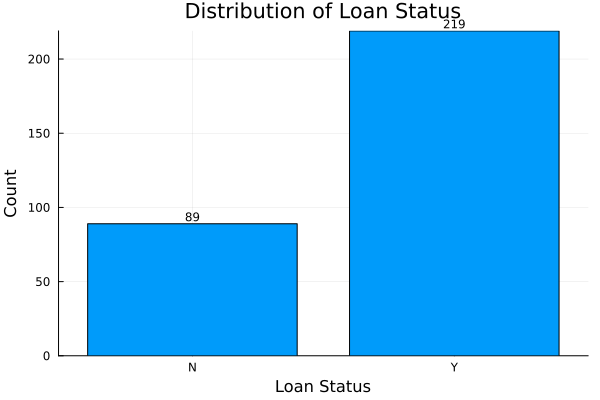

In [11]:
# Calculate the counts for each Loan_Status category
loan_status_counts = combine(groupby(clean_data, :Loan_Status), nrow => :count)

# Generate the bar plot
bar_plot = bar(loan_status_counts.Loan_Status, loan_status_counts.count, 
    xlabel = "Loan Status", 
    ylabel = "Count", 
    title = "Distribution of Loan Status",
    legend = false)

# Add the count annotations on top of each bar
for (x, y) in zip(loan_status_counts.Loan_Status, loan_status_counts.count)
    annotate!(bar_plot, [(x, y, text(string(y), 8, :center, :bottom))])
end

# Printing Output
bar_plot

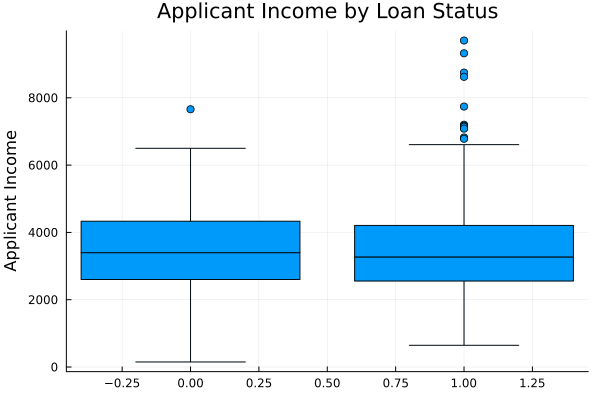

In [12]:
# 2. Applicant Income By Loan Status
boxplot(real_data[!, :Loan_Status], real_data[!, :ApplicantIncome], 
    title = "Applicant Income by Loan Status", 
    ylabel = "Applicant Income",
    legend = false
    )

In [13]:
# 3. Gender Histogram
histogram(real_data[!, :Gender], bins = 2, title = "Gender Distribution", legend = false)

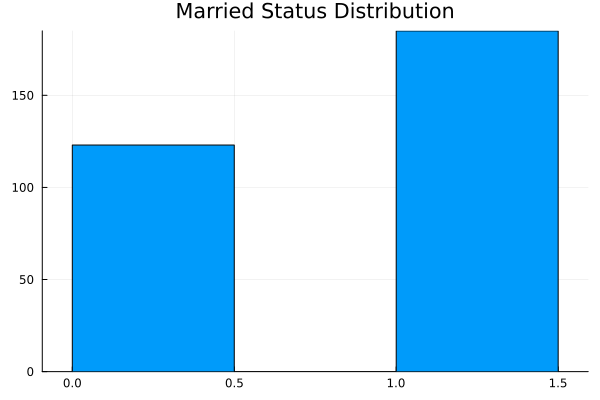

In [14]:
# 4. Married Histogram
histogram(real_data[!, :Married], bins = 2, title = "Married Status Distribution", legend = false)

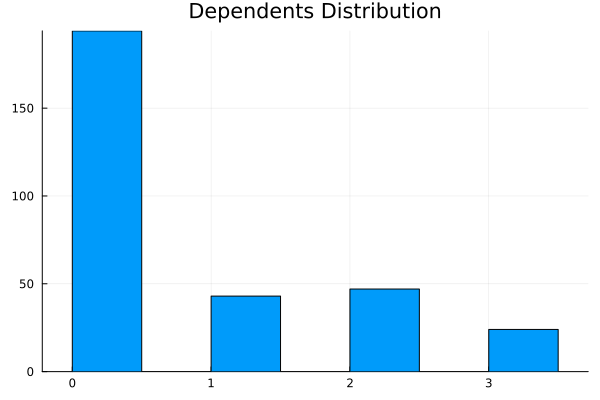

In [15]:
# 5. Dependent Histogram
histogram(real_data[!, :Dependents], title = "Dependents Distribution", legend = false)

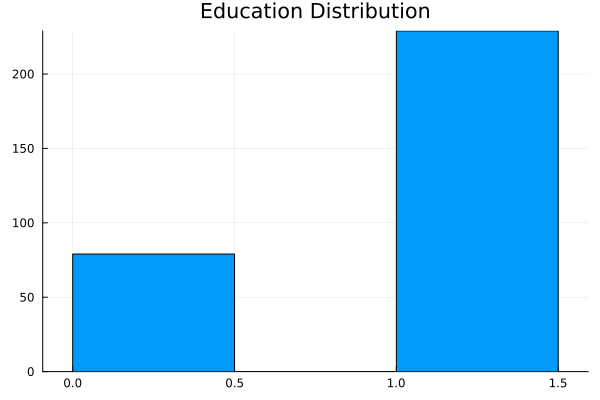

In [16]:
# 6. Education Histogram
histogram(real_data[!, :Education], bins = 2, title = "Education Distribution", legend = false)

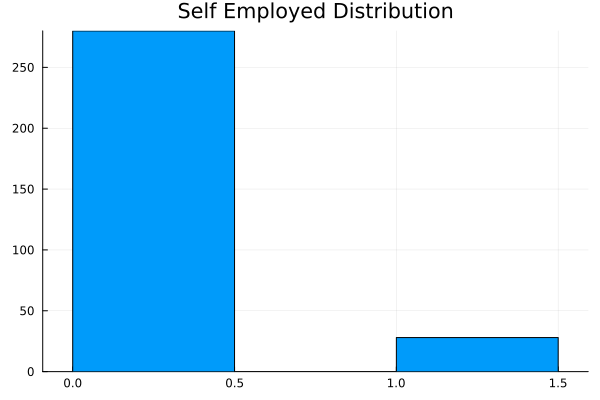

In [17]:
# 7. Self_Employed Histogram
histogram(real_data[!, :Self_Employed], bins = 2, title = "Self Employed Distribution", legend = false)

In [18]:
# 8. ApplicantIncome Histogram
histogram(real_data[!, :ApplicantIncome], title = "Applicant Income Distribution", xlabel = "Income", ylabel = "Frequency", legend = false)

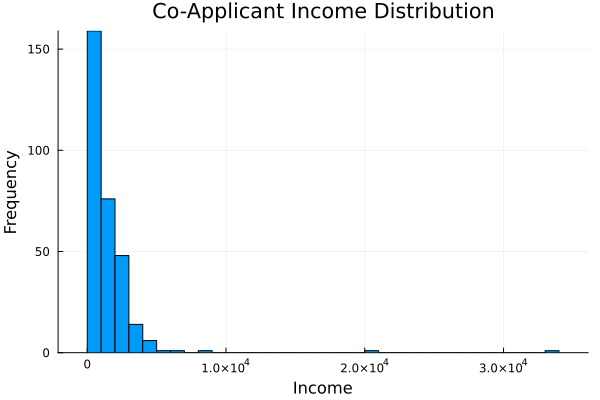

In [19]:
# 9. CoApplicantIncome Histogram
histogram(real_data[!, :CoapplicantIncome], title = "Co-Applicant Income Distribution", xlabel = "Income", ylabel = "Frequency", legend = false)

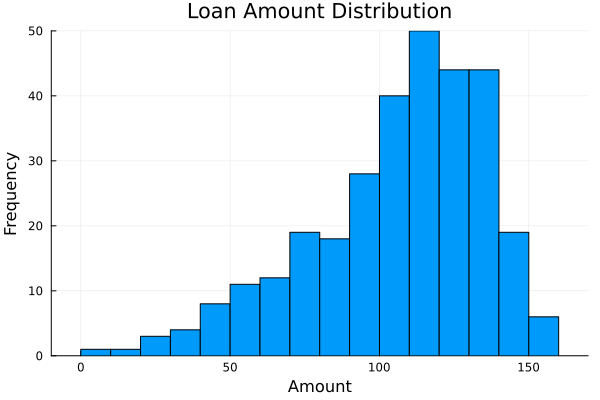

In [20]:
# 10. LoanAmount Histogram
loan_amount_hist = histogram(real_data[!, :LoanAmount], title = "Loan Amount Distribution", xlabel = "Amount", ylabel = "Frequency", legend = false)

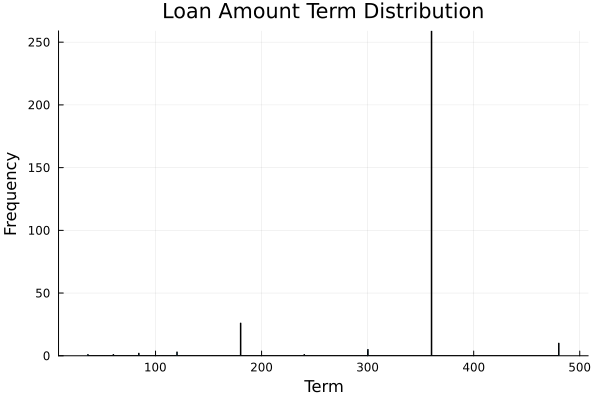

In [21]:
# 11. Loan_Amount_Term Histogram
loan_amount_term_hist = histogram(real_data[!, :Loan_Amount_Term], title = "Loan Amount Term Distribution", xlabel = "Term", ylabel = "Frequency", legend = false)

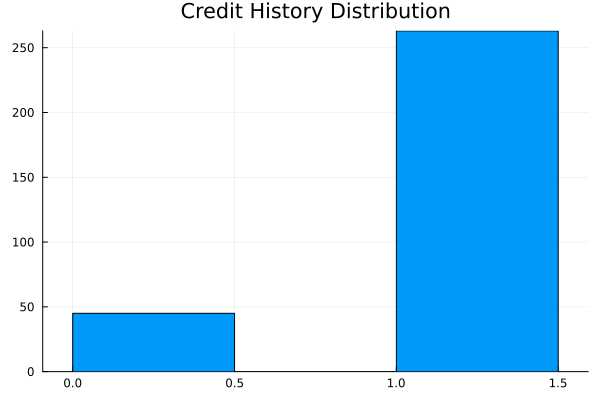

In [22]:
# 12. Credit History Histogram
credit_history_hist = histogram(real_data[!, :Credit_History], bins = 2, title = "Credit History Distribution", legend = false)

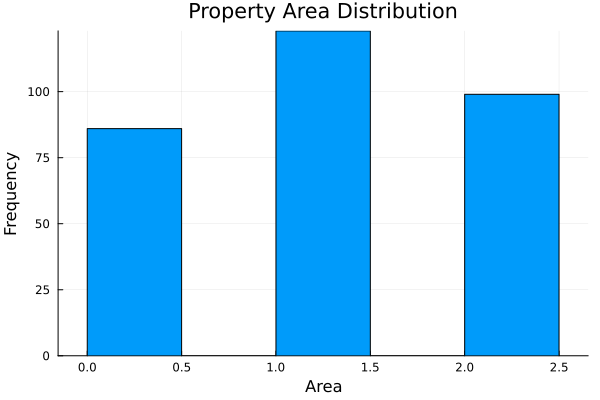

In [23]:
# 13. Property Area Histogram
property_area_hist = histogram(real_data[!, :Property_Area], title = "Property Area Distribution", xlabel = "Area", ylabel = "Frequency", legend = false)

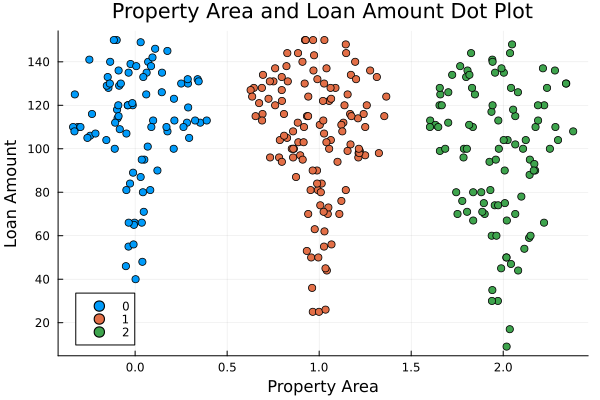

In [24]:
# 14. Property_Area vs Loan Amount Dot plot
xs = real_data[!, :Property_Area]
ys = real_data[!, :LoanAmount]

dotplot(xs, ys,
    title = "Property Area and Loan Amount Dot Plot",
    xlabel = "Property Area",
    ylabel = "Loan Amount",
    group = xs,
)

In [25]:
# 15. Property_Area vs 
xs = real_data[!, :Property_Area]
ys = real_data[!, :Loan_Amount_Term]

violin(xs, ys,
    title = "Property and Loan Amount Term Violin Plot",
    xlabel = "Property Area",
    ylabel = "Loan_Amount_Term",
    group = xs,
)

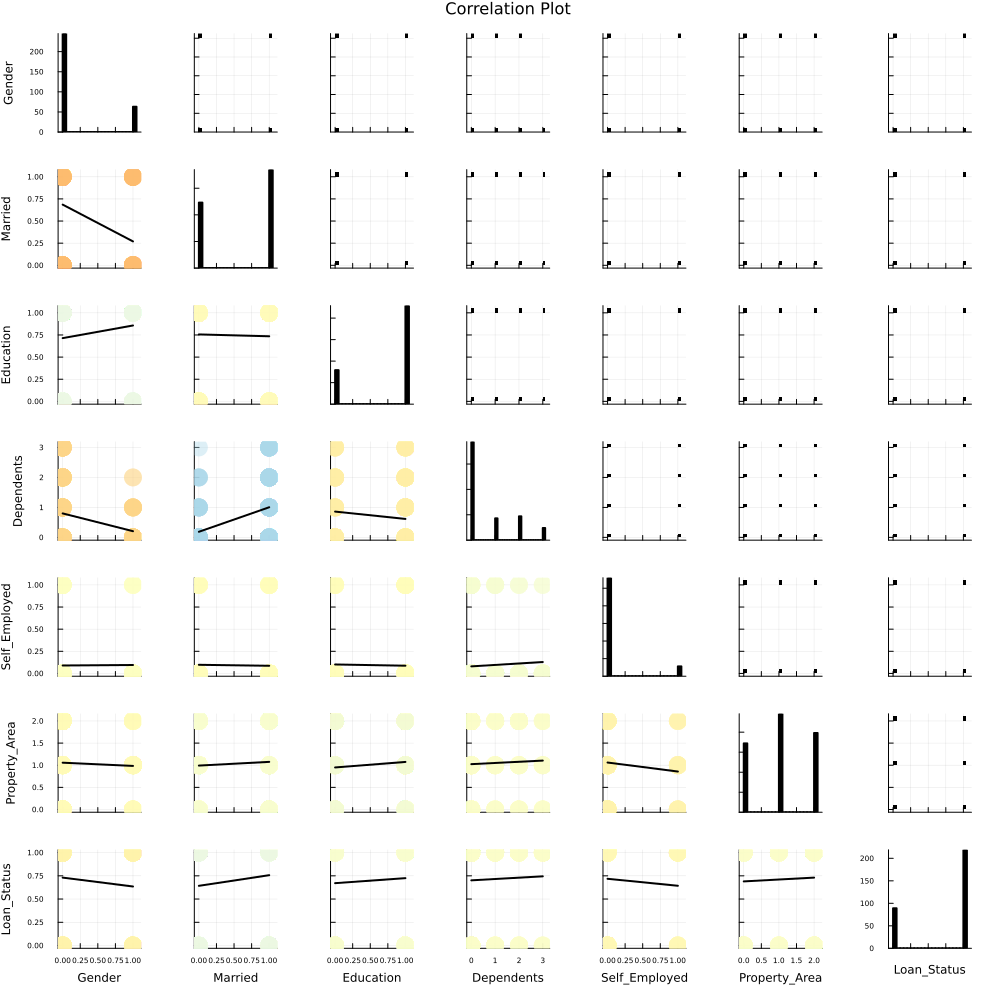

In [26]:
# 16. Correlation Plot Analysis part 1
selected_cols = [
    :Gender,
    :Married,
    :Education,
    :Dependents,
    :Self_Employed,
    :Property_Area,
    :Loan_Status
    ]
@df real_data corrplot(cols(selected_cols),
    size = (1000, 1000),
    bins = 32,
    title = "Correlation Plot",
    xlabel = "Variable",
    ylabel = "Variable",
    labelfontsize = 8,
    tickfontsize = 5,
    linewidth = 2,
    markersize = 10,
    clim = (-1, 1),
    colorbar_title = "Correlation Coefficient"
)

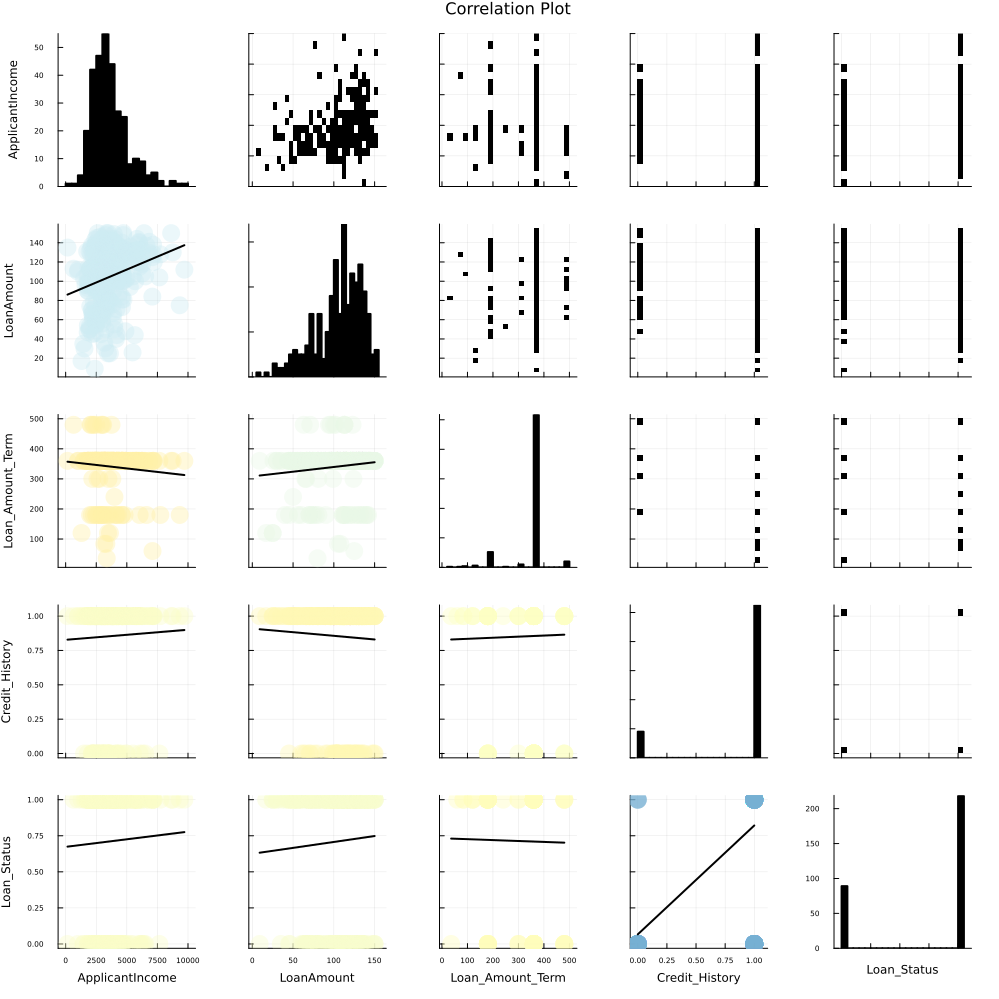

In [27]:
# 17. Correlation Plot Analysis part 2
selected_cols = [
    :ApplicantIncome,
    :LoanAmount,
    :Loan_Amount_Term,
    :Credit_History,
    :Loan_Status
    ]
@df real_data corrplot(cols(selected_cols),
    size = (1000, 1000),
    bins = 32,
    title = "Correlation Plot",
    xlabel = "Variable",
    ylabel = "Variable",
    labelfontsize = 8,
    tickfontsize = 5,
    linewidth = 2,
    markersize = 10,
    clim = (-1, 1),
    colorbar_title = "Correlation Coefficient"
)

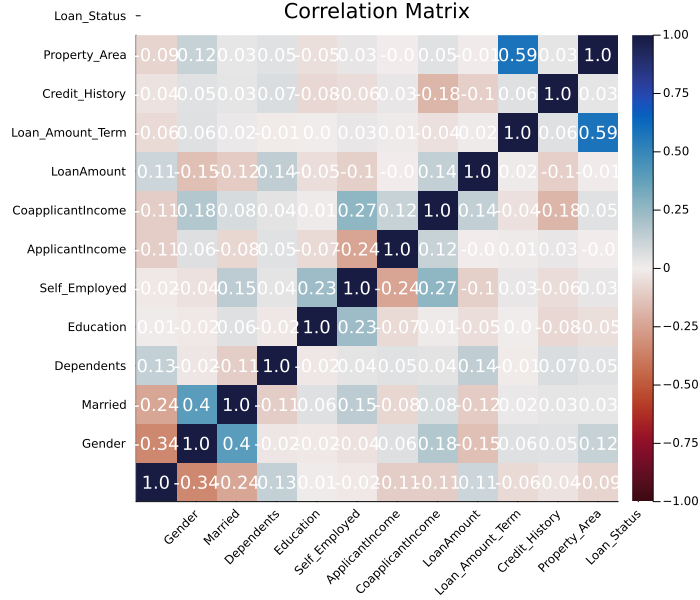

In [28]:
# 18. Correlation Matrix for All Variables
M = cor(Matrix(real_data[!, 2:13]))

vars = names(real_data)[2:13]

fig = heatmap(M,
  title = "Correlation Matrix",
  clims = (-1, 1),
  xticks = (2:13, vars),
  yticks = (2:13, vars),
  color = cgrad(:balance, rev = true),
  xrot = 45,
  aspect = :ratio,
  size = (700, 600),
)

for j in axes(M, 2), i in axes(M, 1)
  annotate!(i, j, text("$(round(M[i,j], digits = 2))", :white, 12))
end

fig

### Data Modeling Starts Here

In [29]:
select!(real_data, Not(:Loan_ID))

308×12 DataFrame
 Row │ Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  ⋯
     │ Int64   Int64    Int64       Int64      Int64          Int64            ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │      0        1           1          1              0             4583  ⋯
   2 │      0        1           0          1              1             3000
   3 │      0        1           0          0              0             2583
   4 │      0        0           0          1              0             6000
   5 │      0        1           0          0              0             2333  ⋯
   6 │      0        1           2          1              0             3200
   7 │      0        0           0          1              0             1853
   8 │      0        1           2          1              0             1299
  ⋮  │   ⋮        ⋮         ⋮           ⋮            ⋮               ⋮         ⋱
 302 │      0        1           0          1              0             3859  ⋯
 303 │      0        0           0          0              0             3833
 304 │      0        1           3          1              0             5703
 305 │      0        1           0          1              0             3232
 306 │      1        0           0          1              0             2900  ⋯
 307 │      0        1           3          1              0             4106
 308 │      1        0           0          1              1             4583
                                                  6 columns and 293 rows omitted

In [30]:
hot = MLJ.fit!(machine(OneHotEncoder(), real_data))

# apply the dummy coding scheme; note that we qualify `transform`
data_hot_encoded = MLJ.transform(hot, real_data)

# check
schema(data_hot_encoded)

┌ Info: Training machine(OneHotEncoder(features = Symbol[], …), …).
└ @ MLJBase /Users/nathanielzhu/.julia/packages/MLJBase/mIaqI/src/machines.jl:493


┌───────────────────┬────────────┬─────────┐
│ names             │ scitypes   │ types   │
├───────────────────┼────────────┼─────────┤
│ Gender            │ Count      │ Int64   │
│ Married           │ Count      │ Int64   │
│ Dependents        │ Count      │ Int64   │
│ Education         │ Count      │ Int64   │
│ Self_Employed     │ Count      │ Int64   │
│ ApplicantIncome   │ Count      │ Int64   │
│ CoapplicantIncome │ Continuous │ Float64 │
│ LoanAmount        │ Continuous │ Float64 │
│ Loan_Amount_Term  │ Continuous │ Float64 │
│ Credit_History    │ Continuous │ Float64 │
│ Property_Area     │ Count      │ Int64   │
│ Loan_Status       │ Count      │ Int64   │
└───────────────────┴────────────┴─────────┘


In [31]:
rng = StableRNG(1997)

train, test = partition(data_hot_encoded, 0.7; rng = rng, shuffle = true)

(216×12 DataFrame
 Row │ Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  ⋯
     │ Int64   Int64    Int64       Int64      Int64          Int64            ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │      0        0           0          0              0             2333  ⋯
   2 │      1        1           1          1              0             4608
   3 │      0        0           0          1              1             7167
   4 │      1        0           0          1              0             3159
   5 │      1        0           1          0              0             4606  ⋯
   6 │      0        1           0          1              0             3232
   7 │      0        1           2          1              0             5935
   8 │      1        0           0          0              0             3400
  ⋮  │   ⋮        ⋮         ⋮           ⋮            ⋮               ⋮         ⋱
 210 │      0        1      

In [32]:
y = categorical((real_data[!, :Loan_Status]), levels = [0,1])
X = select(real_data, Not([:Loan_Status]))
levels(y)

2-element Vector{Int64}:
 0
 1

In [33]:
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=1997);

In [34]:
# checking best models for our work

for m in models(matching(X, y))
    println("""
    [Model: $(m.name)]
    \t prediction type: $(m.prediction_type)
    \t source package:  $(m.package_name)
    """)
end

[Model: AdaBoostStumpClassifier]
	 prediction type: probabilistic
	 source package:  DecisionTree

[Model: CatBoostClassifier]
	 prediction type: probabilistic
	 source package:  CatBoost

[Model: ConstantClassifier]
	 prediction type: probabilistic
	 source package:  MLJModels

[Model: DecisionTreeClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: DecisionTreeClassifier]
	 prediction type: probabilistic
	 source package:  DecisionTree

[Model: DeterministicConstantClassifier]
	 prediction type: deterministic
	 source package:  MLJModels

[Model: EvoTreeClassifier]
	 prediction type: probabilistic
	 source package:  EvoTrees

[Model: KernelPerceptronClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: NeuralNetworkClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: PegasosClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: PerceptronClassifier]
	 prediction type: probabilisti

Here are all the models that would works in this project:

[Model: AdaBoostStumpClassifier]
	 prediction type: probabilistic
	 source package:  DecisionTree

[Model: CatBoostClassifier]
	 prediction type: probabilistic
	 source package:  CatBoost

[Model: ConstantClassifier]
	 prediction type: probabilistic
	 source package:  MLJModels

[Model: DecisionTreeClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: DecisionTreeClassifier]
	 prediction type: probabilistic
	 source package:  DecisionTree

[Model: DeterministicConstantClassifier]
	 prediction type: deterministic
	 source package:  MLJModels

[Model: EvoTreeClassifier]
	 prediction type: probabilistic
	 source package:  EvoTrees

[Model: KernelPerceptronClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: NeuralNetworkClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: PegasosClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: PerceptronClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: RandomForestClassifier]
	 prediction type: probabilistic
	 source package:  BetaML

[Model: RandomForestClassifier]
	 prediction type: probabilistic
	 source package:  DecisionTree

[Model: RandomForestClassifier]
	 prediction type: probabilistic
	 source package:  MLJScikitLearnInterface

[Model: StableForestClassifier]
	 prediction type: probabilistic
	 source package:  SIRUS

[Model: StableRulesClassifier]
	 prediction type: probabilistic
	 source package:  SIRUS

In [35]:
KNNClassifier = @load KNNClassifier verbosity = 0
LDA = @load LDA verbosity = 0
NeuralNetworkClassifier = @load NeuralNetworkClassifier pkg = MLJFlux verbosity = 0
MultinomialClassifier = @load MultinomialClassifier verbosity = 0
CatBoostClassifier = @load CatBoostClassifier verbosity = 0 pkg = CatBoost verbosity = 0
RandomForestClassifier = @load RandomForestClassifier pkg=BetaML verbosity = 0
DecisionTreeClassifier = @load DecisionTreeClassifier pkg = DecisionTree verbosity = 0

model_list = [
    KNNClassifier(K = 5), # use nearest 5-neighbors to make predictions
    LDA(),
    NeuralNetworkClassifier(),
    MultinomialClassifier(),
    CatBoostClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

7-element Vector{Probabilistic}:
 KNNClassifier(K = 5, …)
 LDA(method = gevd, …)
 NeuralNetworkClassifier(builder = Short(n_hidden = 0, …), …)
 MultinomialClassifier(lambda = 2.220446049250313e-16, …)
 CatBoostClassifier(iterations = 1000, …)
 RandomForestClassifier(n_trees = 30, …)
 DecisionTreeClassifier(max_depth = -1, …)

In [36]:
acc = Float64[] # accuracy()
pre = Float64[] # multiclass_precision()
rec = Float64[] # multiclass_recall()
f1s = Float64[] # f1score()
mat = []        # confusion_matrix()

Any[]

In [37]:
for clf in model_list
    # Create a pipeline model that standardizes, then fits a classifier.
    model = Pipeline(Standardizer(), clf)

    # Fit the model onto the training set
    mach = machine(model, X, y)
    MLJ.fit!(mach, rows = train, verbosity = 0)

    # Make predictions on the test set
    yhat = MLJ.predict(mach, rows = test)

    # Evaluate the model on the test set using selected metrics
    #
    # NOTES:
    #
    #   - MLJ.predict() may give probabilistic predictions. Use mode() to collapse to a concrete target.
    #   - An evaluation metric F() always accepts inputs as F(fitted, observed).
    
    push!(acc, accuracy(mode.(yhat), y[test]))
    push!(pre, multiclass_precision(mode.(yhat), y[test]))
    push!(rec, multiclass_recall(mode.(yhat), y[test]))
    push!(f1s, f1score(mode.(yhat), y[test]))
    push!(mat, ConfusionMatrix(levels = levels(y))(mode.(yhat), y[test]))
    
end

┌ Warning: Levels not explicitly ordered. Using the order CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/nathanielzhu/.julia/packages/StatisticalMeasures/hPDX2/src/confusion_matrices.jl:339
┌ Warning: Levels not explicitly ordered. Using the order CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/nathanielzhu/.julia/packages/StatisticalMeasures/hPDX2/src/confusion_matrices.jl:339
┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(11 => 5, σ)
│   summary(x) = 11×1 Matrix{Float64}
└ @ Flux /Users/nathanielzhu/.julia/packages/Flux/vzwqj/src/layers/stateless.jl:60
┌ Warning: Levels not explicitly ordered. Using the order CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/nathanielzhu/.julia/pac

In [1]:
results = DataFrame(
    Model = typeof.(model_list),
    Accuracy = acc,
    Precision = pre,
    Recall = rec,
    F1 = f1s
)

UndefVarError: UndefVarError: `model_list` not defined

In [ ]:
@show mat[2]

In [ ]:
glm_df = DataFrame(copy(real_data))

glm_df[!, :Credit_History] = CategoricalArray(glm_df[!, :Credit_History])
glm_df[!, :Property_Area] = CategoricalArray(glm_df[!, :Property_Area])
glm_df[!, :Loan_Status] = CategoricalArray(glm_df[!, :Loan_Status])
glm_df[!, :Education] = CategoricalArray(glm_df[!, :Education])
glm_df[!, :Gender] = CategoricalArray(glm_df[!, :Gender])
glm_df[!, :Self_Employed] = CategoricalArray(glm_df[!, :Self_Employed])

# Define the formula for logistic regression
formula = @formula(Loan_Status ~ ApplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History + Property_Area)

# Fit the logistic regression model
# model = lm(@formula(Loan_Status ~ ApplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History + Property_Area), glm_df)

probit = glm(@formula(Loan_Status ~ ApplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History + Property_Area), glm_df, Binomial(), ProbitLink())

# Print the model summary
println(model)